In [1]:
from tkinter import *
from PIL import ImageTk,Image
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
root= Tk()
root.title("Leaf Disease Detection")
space=Label(root,text=" ").pack()
Mylabel1=Label(root,text="Leaf Disease Detection",font=('verdana', 14, 'bold')).pack()
space=Label(root,text=" ").pack()
Mylabel2=Label(root,text="Enter the image name",font=('verdana', 12)).pack()
space=Label(root,text=" ").pack()
e=Entry(root,width=50)
e.pack()


In [3]:
############################################## DATASET PREPARATION #############################################

dataset = pd.read_csv("/home/khanna/Desktop/54_ML_in_agricultural_domain/Datasets/19000/19000_train_features.csv")
dataset1 = pd.read_csv("/home/khanna/Desktop/54_ML_in_agricultural_domain/Datasets/19000/bp_train_features.csv")
dataset2 = pd.read_csv("/home/khanna/Desktop/54_ML_in_agricultural_domain/Datasets/19000/p_train_features.csv")
dataset3= pd.read_csv("/home/khanna/Desktop/54_ML_in_agricultural_domain/Datasets/19000/t_train_features.csv")
breakpoints = [1,2475,2476,4627,4628,19087]
breakpoints1 = [1,997,998,2475]
breakpoints2 = [1,1000,1001,1152,1153,2152]
breakpoints3 = [1,1404,1405,1777,1778,4985,4986,7112,7113,8112,8113,9703,9704,11612,11613,12564,12565,14334,14335,14460]
#,121,160,161,200,201,240,241,280,281,320,321,360,361,399] 
maindir = "/home/khanna/Desktop/54_ML_in_agricultural_domain/Datasets"
ds_path = maindir + "/19000"
img_files = os.listdir(ds_path)
svm_clf = None
knn = None
knn_bp = None
knn_p = None
knn_t = None
accuracy_bp = None
accuracy_p = None
accuracy_t = None
vector = None
X_query = None
identify_ans = None
final_ans =  None
final_str = None

In [4]:
target_list = []
for j in range(1,19087):
    target_num = j
    #print(target_num)
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        #print(target_num,target)
        target_list.append(target)
# print("Done")
y = np.asarray(target_list)
# print(y)
X = dataset.iloc[:,2:]
#X = dataset.iloc[:,2:]
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 140)
# print(y_test)
# print(X_test)
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [5]:
######################################### MODELS FOR LEAF IDENTIFICATION #######################################
def knn():
    global knn;
    knn = KNeighborsClassifier(n_neighbors = 3 ).fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test) 
    y_pred=knn.predict(X_test)
#     print(knn.confusion_matrix(y_test, y_pred)) 
    from sklearn import metrics
    cm =metrics.confusion_matrix(y_test, y_pred)
    print(accuracy)

#____________________________________________________________________________________________________________

def knn_calc(array):
    global knn
    ans= knn.predict(array)
    return ans
#____________________________________________________________________________________________________________

def identify(ans): 
    if(ans==0):
      str ="Bell Pepper"
    elif(ans==1):
      str="Potato" 
    else:
      str="Tomato"
    return str

#____________________________________________________________________________________________________________

def predict_ans(dis):
    if(dis==0):    
        str = "Diseased Bell Pepper with Bacterial Spot"
    elif(dis==1):    
        str = "Healthy Bell Pepper"
    elif(dis==2):    
        str = "Diseased Potato with Early Blight"
    elif(dis==3):    
        str = "Healthy Potato"
    elif(dis==4):    
        str = "Diseased Potato with Late Blight"
    elif(dis==5):    
        str = "Diseased Tomato with Early Blight"
    elif(dis==6):    
        str = "Diseased Tomato with Spider Mites"
    elif(dis==7):    
        str = "Diseased Tomato with Mosaic virus"
    elif(dis==8):    
        str = "Diseased Tomato with Yellow Leaf Curl Virus"
    elif(dis==9):    
        str = "Diseased Tomato with Bacterial Spot"
    elif(dis==10):    
        str = "Diseased Tomato with Late Blight"
    elif(dis==11):    
        str = "Healthy Tomato"
    elif(dis==12):    
        str = "Diseased Tomato with Seporia Leaf Spot"
    elif(dis==13):    
        str = "Diseased Tomato with Leaf Mold"
    elif(dis==14):    
        str = "Diseased Tomato with Target Spot"
    return str


In [6]:
######################################## MODELS FOR DISEASE DETECTION ########################################

def for_bp():
    target_list = []
    for j in range(1,2476):
        target_num = j
        #print(target_num)
        flag = 0
        i = 0 
        for i in range(0,len(breakpoints1),2):
            if((target_num >= breakpoints1[i]) and (target_num <= breakpoints1[i+1])):
                flag = 1
                break
        if(flag==1):
            target = int((i/2))
            target_list.append(target)
    y = np.array(target_list)
    X = dataset1.iloc[:,1:]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
#     from sklearn.preprocessing import StandardScaler
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)
#     print(X_test)
    global knn_bp
    knn_bp = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
    global accuracy_bp
    accuracy_bp = knn_bp.score(X_test, y_test) 
    y_pred=knn_bp.predict(X_test)
    print(accuracy_bp)

#____________________________________________________________________________________________________________

def for_p():
    target_list = []
    for j in range(1,2153):
        target_num = j
        #print(target_num)
        flag = 0
        i = 0 
        for i in range(0,len(breakpoints2),2):
            if((target_num >= breakpoints2[i]) and (target_num <= breakpoints2[i+1])):
                flag = 1
                break
        if(flag==1):
            target = int((i/2))
            target_list.append(target)
    y = np.array(target_list)
    X = dataset2.iloc[:,1:]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 142)
#     from sklearn.preprocessing import StandardScaler
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)
    global knn_p
    knn_p = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
    global accuracy_p
    accuracy_p = knn_p.score(X_test, y_test) 
    y_pred=knn_p.predict(X_test)
    print(accuracy_p)

    
#____________________________________________________________________________________________________________
        
def for_t():
    target_list = []
    for j in range(1,14460):
        target_num = j
        flag = 0
        i = 0 
        for i in range(0,len(breakpoints3),2):
            if((target_num >= breakpoints3[i]) and (target_num <= breakpoints3[i+1])):
                flag = 1
                break
        if(flag==1):
            target = int((i/2))
            target_list.append(target)
    y = np.array(target_list)
    X = dataset3 .iloc[:,1:]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 142)
#     from sklearn.preprocessing import StandardScaler
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)
    global knn_t
    knn_t = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
    global accuracy_t
    accuracy_t = knn_t.score(X_test, y_test) 
    y_pred=knn_t.predict(X_test)
    print(accuracy_t)


In [7]:
knn()
for_bp()
for_p()
for_t()

0.7207962283918282
0.617124394184168
0.7843866171003717
0.4492392807745505


In [8]:
def predict_dis():
    global identify_ans
    global knn_bp
    global final_ans
    global knn_p
    global knn_t
    if(identify_ans==0):    
        a=  knn_bp.predict(X_query)
        final_ans = a
        dis = final_ans
    elif(identify_ans==1):
        a=  knn_p.predict(X_query)
        final_ans = a
        dis = final_ans +2
    elif(identify_ans==2):
        global knn_t
        a=  knn_t.predict(X_query)
        final_ans = a
        dis = final_ans + 6
    final_str = predict_ans(dis)
    space=Label(root,text=" ").pack()
    Mylabel3=Label(root,text="This is a "+final_str,font=('verdana', 12)).pack()
    
def identify_2():
    global identify_ans
    global X_query
    identify_ans = knn_calc(X_query)
    b = identify(identify_ans)
    space=Label(root,text=" ").pack()
    Mylabel6=Label(root,text="This is a "+b+" leaf",font=('verdana', 12)).pack()
    space=Label(root,text=" ").pack()
    predict_button = Button(root,text="Predict Disease",command=predict_dis,bg='brown', fg='white', font=('helvetica', 10, 'bold')).pack()


def vector_calc():
    im=e.get()+" .JPG"
    imgpath = "/home/khanna/Desktop/54_ML_in_agricultural_domain/Datasets/19000/"+im
    space=Label(root,text=" ").pack()
    Mylabel3=Label(root,text="Leaf Entered : "+im,font=('verdana', 10)).pack()
    main_img = cv2.imread(imgpath)
    
    #Calculate Components
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)         
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    contours,hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0
    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)
    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]
    
    #Add to vector then to X_query
    global vector
    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]
    global X_query
    X_query = [vector]
    
    #Print Image
    space=Label(root,text=" ").pack()
    my_img =Image.open(imgpath)
    my_img = my_img.resize((150,150), Image.ANTIALIAS)
    my_img=ImageTk.PhotoImage(my_img)
    mylabel5=Label(image=my_img)
    mylabel5.image = my_img
    mylabel5.pack()
    
    #Print Image
    space=Label(root,text=" ").pack()
    Mylabel4=Label(root,text = "Vector formed by preprocessing : ",font=('verdana', 12)).pack()
    space=Label(root,text=" ").pack()
    Mylabel4=Label(root,text="Area = "+str(vector[0])+", Perimeter = "+str(vector[1])+", w = "+str(vector[2]),font=('verdana', 10)).pack()
    Mylabel4=Label(root,text="h = "+str(vector[3])+", Aspect Ratio = "+str(vector[4])+", Rectangularity = "+str(vector[5]),font=('verdana', 10)).pack()
    Mylabel4=Label(root,text="Circularity = "+str(vector[6])+", Red Mean = "+str(vector[7])+", Green Mean = "+str(vector[8]),font=('verdana', 10)).pack()
    Mylabel4=Label(root,text="Blue Mean = "+str(vector[9])+", Red Std Dev = "+str(vector[10])+", Green Std Dev = "+str(vector[11]),font=('verdana', 10)).pack()
    Mylabel4=Label(root,text="Blue Std Dev = "+str(vector[12])+", Contrast = "+str(vector[13])+", Correlation = "+str(vector[14]),font=('verdana', 10)).pack()
    Mylabel4=Label(root,text="Inverse Moments = "+str(vector[15])+", and Entropy = "+str(vector[16]),font=('verdana', 10)).pack()
    titles = ['Original Image','Grayscale',
                'Gaussian Blur', 'Otsu Thresholding','After Morphology']
    
    images = [main_img,gs,blur,im_bw_otsu,closing]
    
    for i in range(5):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    #Identify
    space=Label(root,text=" ").pack()
    identify_button = Button(root,text="Identify Leaf",command=identify_2,bg='brown', fg='white', font=('helvetica', 10, 'bold')).pack()


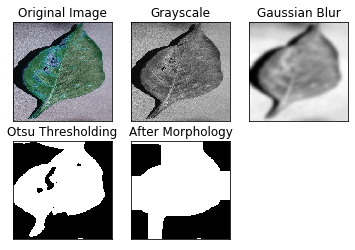

In [9]:
vector_button = Button(root,text="PreProcess",command=vector_calc,bg='brown', fg='white', font=('helvetica',10, 'bold')).pack()
root.mainloop()